# A Quantum Particle in a Potential Well

A particle of mass $m$ is trapped in a square well potential of depth $V_0$ and width $2a$ (See {numref}`fig_qm_well`).  The energy eigenvalue $E$ is determined by the Sch&ouml;dinger equation:

$$
\left[ -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right] \psi(x) = E \psi(x)
$$

Although no closed form solution is available, the analytical calculation indicates that the eigenvalues are determined by the following transcendental equations:{cite}`Griffiths2018`

$$
f_\text{e}(z) \equiv z \tan(z) - \sqrt{z_0^2 - z^2} = 0, \qquad \text{for even states}
$$(eq_square_well_even)

and

$$
f_\text{o}(z) \equiv z \cot(z) + \sqrt{z_0^2 - z^2} = 0, \qquad \text{for odd states}
$$(eq_square_well_odd)

where we introduced the normalized variable and constant:

$$
z = \sqrt{\frac{2 m a^2 E}{\hbar^2}}, \qquad \text{and} \qquad z_0 = \sqrt{\frac{2 m a^2 V_0}{\hbar^2}}
$$



```{figure} square_well_energy.png
---
height: 300px
name: fig_qm_well
---
Wavefunctions and energy levels of a quantum particle bounded in a square potential well.
```

The roots of Eqs. {eq}`eq_square_well_even` and {eq}`eq_square_well_odd` determine the energy eigenvalues. We want to bracket the roots but finding them by a numerical method is not easy since the functions {eq}`eq_square_well_even` and {eq}`eq_square_well_odd` are not continuous. Furthermore, the number of roots depends on the system parameter $z_0$.  Fortunately, we can find the brackets with a little help of mathematics and visualization.  The following code plots $f_1(z)1=z \tan(z)$ and $f_2(z)=\sqrt{z_0^2-z^2}$.  The roots are intersections of the two plots.  $f_1$ diverges at $z=\left(n+1/2\right) \pi$.  $f_2$ is a quarter of a circle with radius $z_0$. 

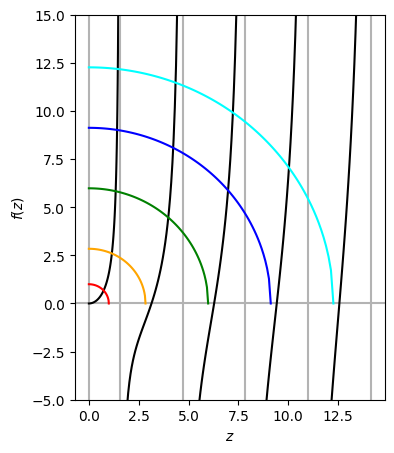

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return z*np.tan(z)

def g(z,z0):
    return np.sqrt(z0**2-z**2)


# for 0 < z < pi/2

N=101
plt.figure(figsize=(4,5))
plt.ylim(-5,15)
plt.xlabel(r'$z$')
plt.ylabel(r"$f(z)$")
plt.axhline(y = 0, color = '0.7', linestyle = '-')
plt.axvline(x = 0, color = '0.7', linestyle = '-')

# for 0 < z < pi/2
z=np.linspace(0,np.pi/2-0.05,N)
y=f(z)
plt.plot(z,y,'-k')
plt.axvline(x = np.pi/2, color='0.7', linestyle = '-')

for k in range(4):
    z0=(k+0.5)*np.pi
    z1=z0+np.pi
# for pi/2 < z < 3*pi/2
    z=np.linspace(z0+0.1,z1-0.1)
    y=f(z)
    plt.plot(z,y,'-k')
    plt.axvline(x = z1, color='0.7', linestyle = '-')

# for z0=1

z0 = np.linspace(0,4,5)*np.pi-0.3
z0[0]=1
c = ['red','orange','green','blue','cyan']

for k in range(5):
    z=np.linspace(0,z0[k],N)
    y=g(z,z0[k])
    plt.plot(z,y,'-',color=c[k])

plt.show()

 It is easy to see from the plot that there is only one root when $z_0<\pi/2$ (red circle).  The root must be between 0 and $\pi/2$.  When $\pi/2 < z_0 < 3\pi/2$ (orange circle), one more root appears.  In general, if $(n-1) \pi < z_0 < n \pi$, then there are $n$ roots.  Notice also that there is only one root between two adjacent discontinuities of $f_1$.  Thus, the first root $r_1$ appears between 0 and $\pi/2$ and the $k$-th root $r_k$ is bracketed between $(k-3/2)\pi$ and $(k-1/2)\pi$  where $2 \le k \le n $.  In actual calculation, we need to slightly narrow the bracket to avoid the divergence of the function.